
# Projeto 1 Visão de máquina

## Alunos: Fernando Sakabe & Giovanni Rozatti

In [1]:
#Célula de imports
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from filtros_extras import *
from fillHoles import fillHoles

error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/shapedescr.cpp:360: error: (-201:Incorrect size of input array) There should be at least 5 points to fit the ellipse in function 'fitEllipseNoDirect'


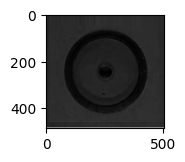

In [2]:
path = "OK"
# path = "NOK_tamanho_forma"
dir_list = os.listdir(path)
for k in range(0,len(dir_list)):
    #encontrar uma maneira mais bonita de fazer a soma das strings abaixo
    img_in = cv2.imread(path + "/" + str(dir_list[k]), cv2.IMREAD_COLOR)
    #img_in = cv2.imread("OK\Fig_OK_15.jpg", cv2.IMREAD_COLOR)
    if img_in is None:
        print("File not found. Bye!")
        exit(0) #Essa linha "crasha" o notebook, caso ocorra reinicar o kernel
    [B,G,R] = cv2.split(img_in)
    
#     plt.figure(figsize=(10,5))
#     plt.subplot (3,5,k+1)
#     plt.imshow(B, cmap="gray")
    returns,thresh=cv2.threshold(B,120,255,cv2.THRESH_BINARY_INV)
    thresh_inverse_8=np.clip(thresh, 0, 255).astype(np.uint8)
    img_out=fillHoles(thresh_inverse_8)
    contours,hierachy=cv2.findContours(img_out,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) != 0:
        max_contours = max(contours, key=len)
        cv2.drawContours(img_in,[max_contours],-1,(0,255,0),3)
        ellipse = cv2.fitEllipse(max_contours)
        cv2.ellipse(img_in,ellipse, (0,0,255), 2)
#         plt.figure(figsize=(10,5))
#         plt.subplot (3,5,k+1)
#         plt.imshow(img_in, cmap="gray")
        (x, y), (MA, ma), angle = ellipse
        diametro=(MA + ma)/508*65/2
        if MA/ma>0.95 and MA/ma<1.05 and diametro<50.5 and diametro>49.5 :
            print('imagem de indice '+str(k+1))
            print((MA + ma)/508*65/2)
plt.show()


In [8]:
#interpretação das rubricas

#tamanho é o diametro
#forma é a relação a/b dos raios das elipses
#borda é as convexidade

# FIG NOK15 é uma bem dificil de detectar o erro

#Achar o erro do contorno:
#a partir da posição central da circunferencia comparar os pontos detectados do contorno com os pontos da circunferencia teórica

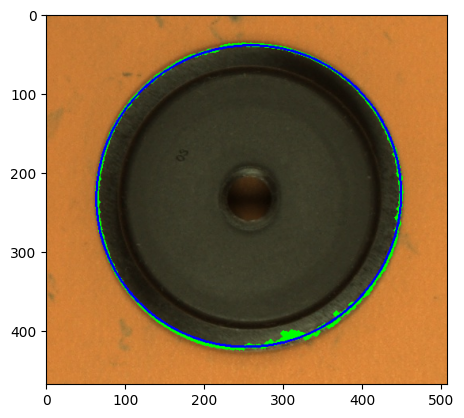

In [9]:
plt.imshow(img_in, cmap="gray")


In [17]:
kernel

array([[ 1,  1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])